# Employee Promotion (HR-Analytics)




# Introduction
    
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. There is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.


# Problem-Statement

Client is a large MNC and they have 9 broad verticals across the organisation. One of the problem client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time.
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs help in identifying the eligible candidates at a particular time point and making the promotion process smoother for the organisation  
   
   
# Data-Source

HR Analytics Challenge , Data-set available in Analytics Vidhya websie. 


# Project-Description

This project work, focuses on which algorithm can work better for this real world problem of
Employee Promotion Classification Problem and there after recommending which are the important factors for classifying.


# Data

<b>Dataset Description</b>

employee_id	--->Unique ID for employee<br/>
department  ---->	Department of employee<br/>
region ---->	Region of employment (unordered)<br/>
education  ---->	Education Level<br/>
gender  ---->	Gender of Employee<br/>
recruitment_channel  ---->	Channel of recruitment for employee<br/>
no_of_trainings  -->	no of other trainings completed in previous year on soft skills, technical skills etc.<br/>
age ---->	Age of Employee<br/>
previous_year_rating --->	Employee Rating for the previous year<br/>
length_of_service ---->	Length of service in years<br/>
KPIs_met >80% ---->	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0<br/>
awards_won?	 ----> if awards won during previous year then 1 else 0<br/>
avg_training_score ---->	Average score in current training evaluations<br/>
is_promoted	(Target) ----> Recommended for promotion<br/>

In [1183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [1184]:
train_df=pd.read_csv(r'C:\Users\DEBADRITO\Desktop\PROJECT FOR CV\HR_ANALYTICS\train_LZdllcl.csv')
train_df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [1185]:
df=train_df

In [1186]:
test_df=pd.read_csv(r'C:\Users\DEBADRITO\Desktop\PROJECT FOR CV\HR_ANALYTICS\test_2umaH9m.csv')
test_df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [1187]:
df.shape

(54808, 14)

In [1188]:
df.columns.unique()

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [1189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [1190]:
train_total = df.isnull().sum()
train_total

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [1191]:
# Percentage of Null Values in the columns
train_percent = ((train_total/54808)*100).round(2)
train_percent

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

In [1192]:
#dtypes of the column having null values
df.education.dtype         

dtype('O')

In [1193]:
df.previous_year_rating.dtype 

dtype('float64')

here we have observed that the percentage of the missing value in the categorical column(education) and the numerical column
(previous_year_rating) is very less that is less than 25 % so we cant drop these columns. We will be dealing with them after
some preliminary analysis.

### EDA and Descriptive Statistics and Data Wranglingling with Target Variable

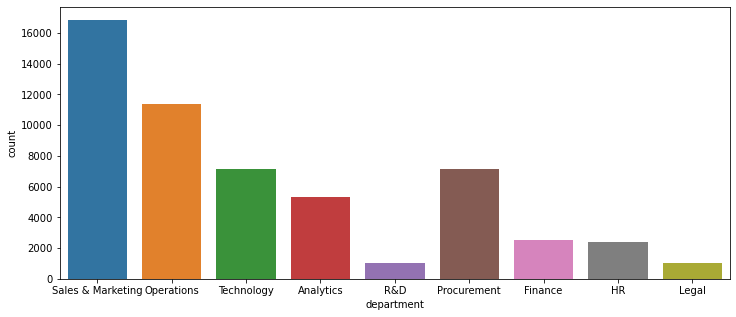

In [1194]:
plt.figure(figsize=(12,5))
sns.countplot(x='department',data=df)

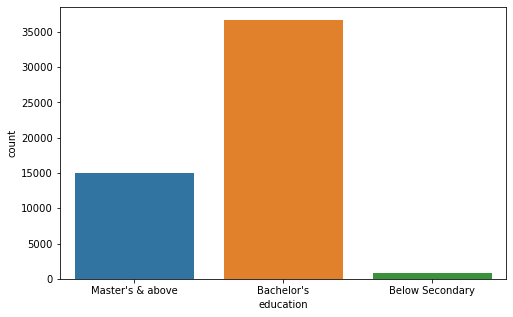

In [1195]:
plt.figure(figsize=(8,5))
sns.countplot(x='education',data=df)

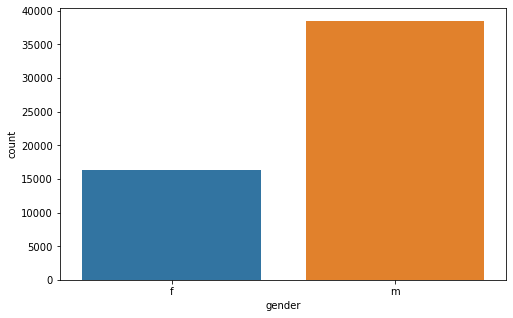

In [1196]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender',data=df)

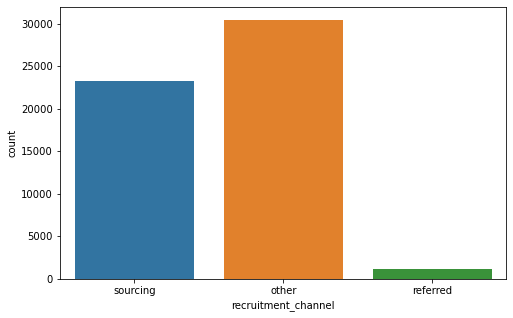

In [1197]:
plt.figure(figsize=(8,5))
sns.countplot(x='recruitment_channel',data=df)

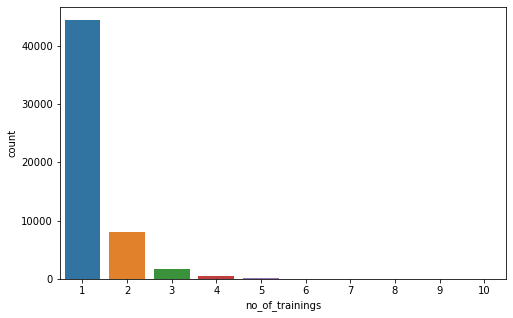

In [1198]:
plt.figure(figsize=(8,5))
sns.countplot(x='no_of_trainings',data=df)

In [1199]:
df.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [1200]:
#checking if this continuos variable is actually traced to categorical
df.age.value_counts()

30    3665
31    3534
32    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1923
39    1695
40    1663
25    1299
41    1289
42    1149
43     992
44     847
24     845
45     760
46     697
47     557
48     557
50     521
49     441
23     428
51     389
53     364
52     351
54     313
55     294
56     264
57     238
22     231
60     217
58     213
59     209
20     113
21      98
Name: age, dtype: int64

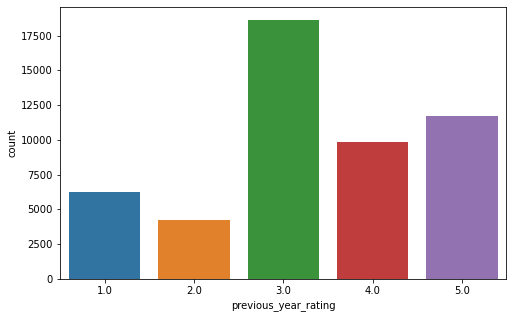

In [1201]:
plt.figure(figsize=(8,5))
sns.countplot(x='previous_year_rating',data=df)

In [1202]:
df.columns.unique()

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

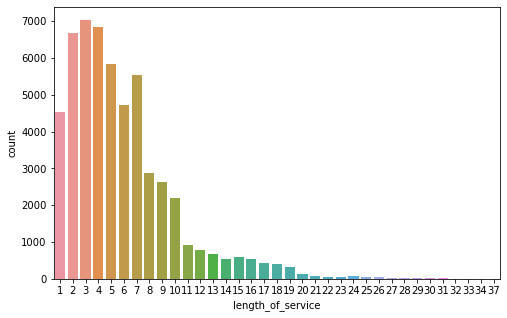

In [1203]:
plt.figure(figsize=(8,5))
sns.countplot(x='length_of_service',data=df)

In [1204]:
df.length_of_service.value_counts()

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64

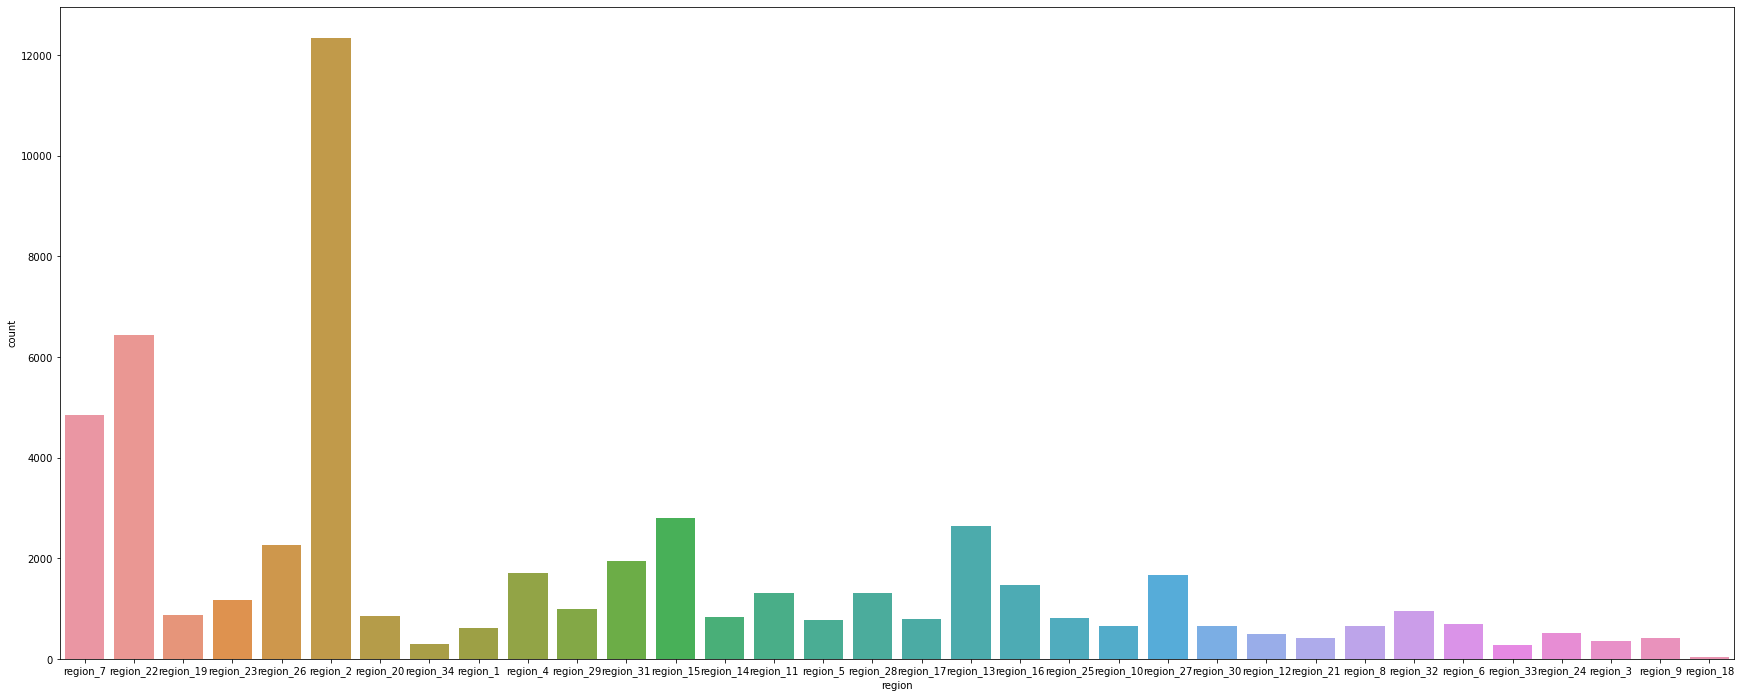

In [1205]:
plt.figure(figsize=(30,12))
sns.countplot(x='region',data=df)

In [1206]:
df.region.value_counts() 

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

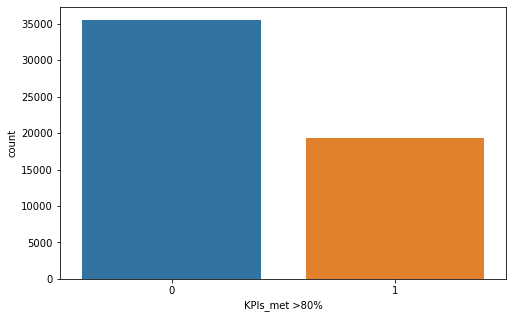

In [1207]:
plt.figure(figsize=(8,5))
sns.countplot(x='KPIs_met >80%',data=df)

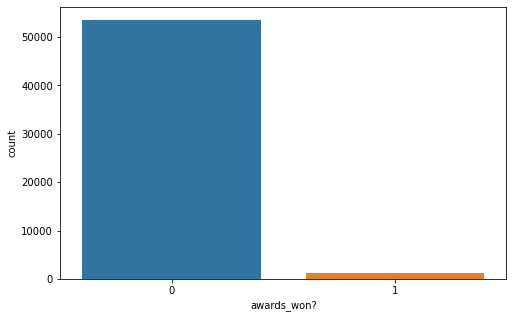

In [1208]:
plt.figure(figsize=(8,5))
sns.countplot(x='awards_won?',data=df)

In [1209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [1210]:
df.avg_training_score.value_counts()

50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64

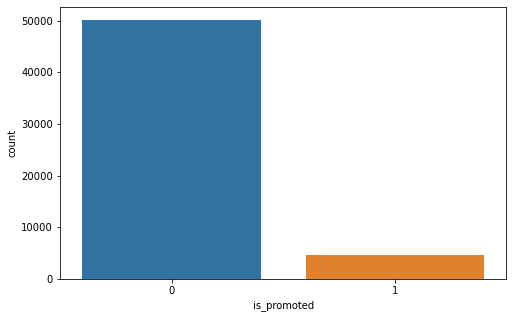

In [1211]:
#Target
plt.figure(figsize=(8,5))
sns.countplot(x='is_promoted',data=df)

In [1212]:
#Interpretation

#### Interpretation
<br/>
Eventhough the data types of the following variables are int but they can be traced as categorical variables<br/>
1. KPIs_met >80%    (0,1)<br/>
2. awards_won?      (0,1)<br/>
3. is_promoted      (0,1) <br/>
<br/>
We would Like to make brackets of category for <b>age</b> also but since the range is some what big we are not putting<br/>
it into any brackets without domain experts knowledge.Same for <b>length_of_service</b> and  <b>avg_training_score </b>     
<br/><br/>
<b>no_of_trainings</b> can be traced as category since it takes (1-8) in numbers.   
<br/>
<br/><b>previous_year_rating</b>  can also be traced as categorical variable eventhough its d.type is float
but it takes discrete values of(1,2,3,4 and 5)<br/>

In [1213]:
#continuos variables

In [1214]:
def desc_stat(x):
    
     
            
       Median = np.median(df[x]) 
       
       Mean   = np.mean(df[x])
    
       Mode   =  df[x].mode()[0]     
       
       plt.figure(figsize=(7,4))

       ax=sns.distplot(df[x],hist=False,bins=30,color="lime")

       ax.axvline(Mean,label='Mean',color='r',linestyle=":",linewidth=3)

       ax.axvline(Median,label='Median',color='b',linestyle="-",linewidth=2)
    
       ax.axvline(Mode,label='Median',color='g',linestyle="-",linewidth=2)

       plt.legend({'Mean':Mean,'Median':Median,'Mode':Mode})


       plt.show

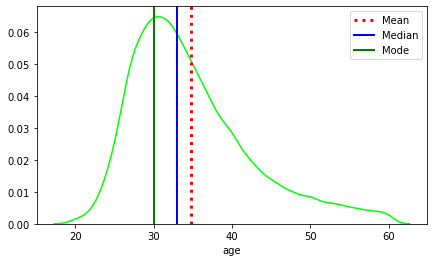

In [1215]:
desc_stat("age")

Positively skewed

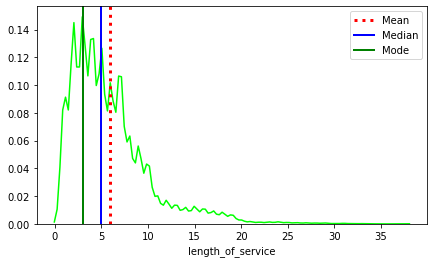

In [1216]:
desc_stat("length_of_service")

Positively skewed

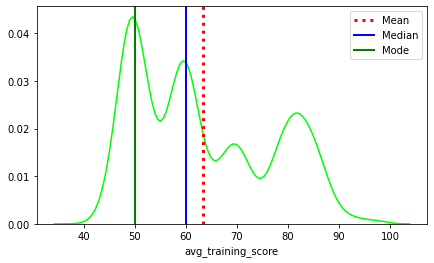

In [1217]:
desc_stat("avg_training_score")

Positively skewed

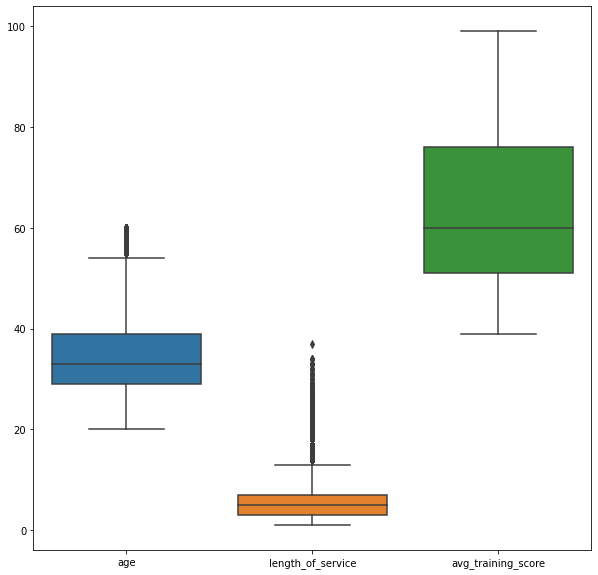

In [1218]:
#boxplot

plt.figure(figsize=(10,10))

sns.boxplot(data=df[['age','length_of_service','avg_training_score']])

In [1219]:
#Preliminary Inference from heat-map

### Data Cleaning,Preparing and Preprocessing

In [1220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


###### dealing with missing values

In [1221]:
#Education (4.40% Null as observed before)

df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [1222]:
#since the frequently occuring observation here is Bachelor's so we will be replacing null with this.

In [1223]:
df.education.fillna("Bachelor's",inplace=True)

In [1224]:
#Taking look at the counts(if changes happened)

df.education.value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [1225]:
df.education.isnull().sum()

0

In [1226]:
df.education.dtype

dtype('O')

In [1227]:
#previous_year_rating (7.52% Null as observed before) -dtype float

In [1228]:
#As we have already mentioned earlier previous_year_rating can also be traced as categorical variable
#eventhough its d.type is float but it takes discrete values of(1,2,3,4 and 5)
#we can replace it wth the most frequently occuring discrete value

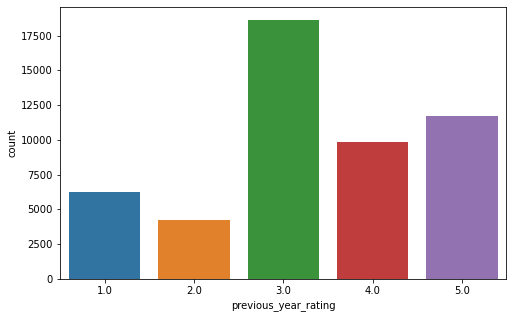

In [1229]:
plt.figure(figsize=(8,5))
sns.countplot(x='previous_year_rating',data=df)

In [1230]:
df["previous_year_rating"].mean()

3.329255780917055

In [1231]:
df.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [1232]:
#from here we can see even the mean of this variable is 3 approximately
#So we will be replacing the null values with 3.0 and we wont be changing the dtype without business experts knowledge

In [1233]:
df.previous_year_rating.fillna(3.0,inplace=True)

In [1234]:
#Taking look at the counts(if changes happened)

df.previous_year_rating.value_counts()

3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [1235]:
df.previous_year_rating.isnull().sum()

0

In [1236]:
df.previous_year_rating.dtype

dtype('float64')

###### Rechecking if no null is present

In [1237]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

<b>Outliers</b><br/>
We are not dealing with the outliers as of now for 'age','length_of_service'and 'avg_training_score' as because 
these 3 features may have influence over promotion so changing randomly with mean value may be an issue. We need sufficient
business experts view point on this.

#### Replacing categorical columns with numerical columns

In [1238]:
df.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [1239]:
#department

department=pd.get_dummies(df['department'],prefix='department')
df=pd.concat([df,department],axis=1)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,0,0,0,0,0,0,0,1,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,0,0,0,0,1,0,0,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,0,0,0,0,0,0,0,1,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,0,0,0,0,0,0,0,1,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,0,0,0,0,0,0,0,0,1


In [1240]:
#gender

gender=pd.get_dummies(df['gender'],prefix='gender')
df=pd.concat([df,gender],axis=1)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_f,gender_m
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,0,0,0,0,0,1,0,1,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,0,0,1,0,0,0,0,0,1
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,0,0,0,0,0,1,0,0,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,0,0,0,0,0,1,0,0,1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,0,0,0,0,0,0,1,0,1


In [1241]:
#Education

education=pd.get_dummies(df['education'],prefix='education')
df=pd.concat([df,education],axis=1)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_f,gender_m,education_Bachelor's,education_Below Secondary,education_Master's & above
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,0,0,1,0,1,0,0,0,1
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,1,0,0,0,0,0,1,1,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,0,0,1,0,0,1,1,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,0,0,1,0,0,1,1,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,0,0,0,1,0,1,1,0,0


In [1242]:
df["education"].isnull().sum()

0

In [1243]:
#Recruitment_channel

recruitment_channel=pd.get_dummies(df['recruitment_channel'],prefix='recruitment_channel')
df=pd.concat([df,recruitment_channel],axis=1)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,department_Sales & Marketing,department_Technology,gender_f,gender_m,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,1,0,1,0,0,0,1,0,0,1
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,0,0,1,1,0,0,1,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,1,0,0,1,1,0,0,0,0,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,1,0,0,1,1,0,0,1,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,1,0,1,1,0,0,1,0,0


In [1244]:
# Looking in the updated and new columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   54808 non-null  int64  
 1   department                    54808 non-null  object 
 2   region                        54808 non-null  object 
 3   education                     54808 non-null  object 
 4   gender                        54808 non-null  object 
 5   recruitment_channel           54808 non-null  object 
 6   no_of_trainings               54808 non-null  int64  
 7   age                           54808 non-null  int64  
 8   previous_year_rating          54808 non-null  float64
 9   length_of_service             54808 non-null  int64  
 10  KPIs_met >80%                 54808 non-null  int64  
 11  awards_won?                   54808 non-null  int64  
 12  avg_training_score            54808 non-null  int64  
 13  i

In [1245]:
# Now removing the old categorical columns except "region" column on which we will be working later

In [1246]:
df.drop(['department','education','recruitment_channel','gender'],inplace=True,axis=1)
df.head(5)

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_Sales & Marketing,department_Technology,gender_f,gender_m,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,region_7,1,35,5.0,8,1,0,49,0,...,1,0,1,0,0,0,1,0,0,1
1,65141,region_22,1,30,5.0,4,0,0,60,0,...,0,0,0,1,1,0,0,1,0,0
2,7513,region_19,1,34,3.0,7,0,0,50,0,...,1,0,0,1,1,0,0,0,0,1
3,2542,region_23,2,39,1.0,10,0,0,50,0,...,1,0,0,1,1,0,0,1,0,0
4,48945,region_26,1,45,3.0,2,0,0,73,0,...,0,1,0,1,1,0,0,1,0,0


In [1247]:
# Rechecking if old columns (categorical) except "region" are removed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   54808 non-null  int64  
 1   region                        54808 non-null  object 
 2   no_of_trainings               54808 non-null  int64  
 3   age                           54808 non-null  int64  
 4   previous_year_rating          54808 non-null  float64
 5   length_of_service             54808 non-null  int64  
 6   KPIs_met >80%                 54808 non-null  int64  
 7   awards_won?                   54808 non-null  int64  
 8   avg_training_score            54808 non-null  int64  
 9   is_promoted                   54808 non-null  int64  
 10  department_Analytics          54808 non-null  uint8  
 11  department_Finance            54808 non-null  uint8  
 12  department_HR                 54808 non-null  uint8  
 13  d

#### working on "region" column

In [1248]:
df.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [1249]:
# Region wise checking Total Promotions
# 0 is no promotion and 1 is promotion
# group by to check the nos. of 1s in all the regions

df.loc[df.is_promoted == 1 ].groupby('region')['is_promoted'].count()

region
region_1      58
region_10     51
region_11     74
region_12     33
region_13    230
region_14     62
region_15    222
region_16    102
region_17    109
region_18      1
region_19     53
region_2     989
region_20     49
region_21     18
region_22    734
region_23    137
region_24     18
region_25    103
region_26    143
region_27    131
region_28    154
region_29     43
region_3      37
region_30     59
region_31    110
region_32     40
region_33     10
region_34      8
region_4     246
region_5      35
region_6      32
region_7     516
region_8      53
region_9       8
Name: is_promoted, dtype: int64

<b>region_2 has the highest nos. of promotions where as region_18 has the least number of promotions</b><br/>
We did this groupby to check the same list after label encoding as we are not sure if in <br/>
bar-plot we can match the encoded region with the previous non-encoded records.(i.e we are keeping a track of what changes we did), easier for mapping when ever needed.

In [1250]:
#Barplot with group-by for regions for is_promoted

Text(0, 0.5, 'Total Promotions')

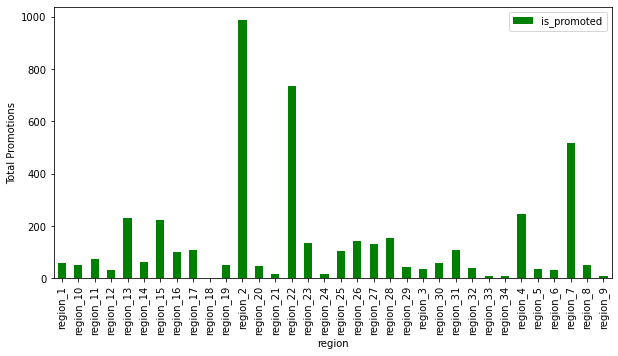

In [1251]:
#checking region with is_promoted 
#total promotions for a given region will be sum of 1s, 0+1=1, so all the 1s adds upto total promotions

df.groupby(['region']).agg({'is_promoted':'sum'}).plot.bar(cmap="ocean",width = 0.5,figsize=(10,5))
plt.ylabel("Total Promotions")

In [1252]:
df.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

From the above plot we can observe that region 2,region 22, region 7 includes<br/>
most number of promoted employees.We can say that these regions will have influence on promotion "yes"<br/>
but we cant even avoid the others as we can alternatively see that employees from theother region couldnt <br/>
get as much promotion as from the mentioned regions.We would have liked to incorporate the dummies here<br/>
but there might be a challenge with the increased number of features. So we will be doing a label encoding for these columns<br/>
More over this column doesnt have any null values<br/>


In [1253]:
#Using Label Encoding for region to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df.head(5)

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_Sales & Marketing,department_Technology,gender_f,gender_m,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,31,1,35,5.0,8,1,0,49,0,...,1,0,1,0,0,0,1,0,0,1
1,65141,14,1,30,5.0,4,0,0,60,0,...,0,0,0,1,1,0,0,1,0,0
2,7513,10,1,34,3.0,7,0,0,50,0,...,1,0,0,1,1,0,0,0,0,1
3,2542,15,2,39,1.0,10,0,0,50,0,...,1,0,0,1,1,0,0,1,0,0
4,48945,18,1,45,3.0,2,0,0,73,0,...,0,1,0,1,1,0,0,1,0,0


Text(0, 0.5, 'Total Promotions')

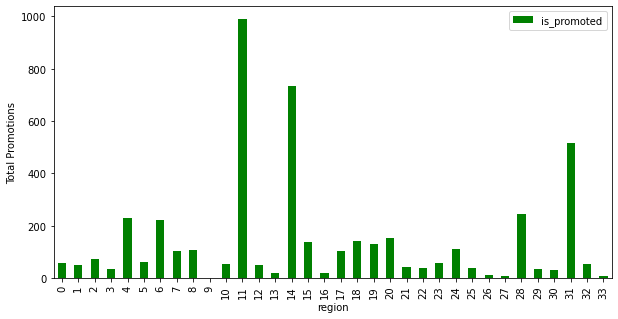

In [1254]:
#checking new region column with is_promoted 
#total promotions for a given region will be sum of 1s, 0+1=1, so all the 1s adds upto total promotions


df.groupby(['region']).agg({'is_promoted':'sum'}).plot.bar(cmap="ocean",width = 0.5,figsize=(10,5))
plt.ylabel("Total Promotions")

<b>Noting</b><br/> the label encoded values for important regions:<br/>
region 2,region 22, region 7 has been encoded as  11,14 and 31 respectively.


In [1255]:
#After encoding region vs is_promoted

df.loc[df.is_promoted == 1 ].groupby('region')['is_promoted'].count()

region
0      58
1      51
2      74
3      33
4     230
5      62
6     222
7     102
8     109
9       1
10     53
11    989
12     49
13     18
14    734
15    137
16     18
17    103
18    143
19    131
20    154
21     43
22     37
23     59
24    110
25     40
26     10
27      8
28    246
29     35
30     32
31    516
32     53
33      8
Name: is_promoted, dtype: int64

In [1256]:
#checking the new labels for region (total 33 labels)

df.region.unique()

array([31, 14, 10, 15, 18, 11, 12, 27,  0, 28, 21, 24,  6,  5,  2, 29, 20,
        8,  4,  7, 17,  1, 19, 23,  3, 13, 32, 25, 30, 26, 16, 22, 33,  9])

In [1257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   54808 non-null  int64  
 1   region                        54808 non-null  int32  
 2   no_of_trainings               54808 non-null  int64  
 3   age                           54808 non-null  int64  
 4   previous_year_rating          54808 non-null  float64
 5   length_of_service             54808 non-null  int64  
 6   KPIs_met >80%                 54808 non-null  int64  
 7   awards_won?                   54808 non-null  int64  
 8   avg_training_score            54808 non-null  int64  
 9   is_promoted                   54808 non-null  int64  
 10  department_Analytics          54808 non-null  uint8  
 11  department_Finance            54808 non-null  uint8  
 12  department_HR                 54808 non-null  uint8  
 13  d

<b>So all the caregorical columns having numerical value</b>

<b>Now we will avoid dummy trap for the</b> <br>recruitment_channel<br/>education<br/>gender<br/>department,

We will be dropping "recruitment_channel_sourcing" ,"gender_f" , "department_Technology" and "education_Master's & above"

In [1258]:
df.drop(['recruitment_channel_sourcing','gender_f','department_Technology',"education_Master's & above"],inplace=True,axis=1)
df.head(5)

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,gender_m,education_Bachelor's,education_Below Secondary,recruitment_channel_other,recruitment_channel_referred
0,65438,31,1,35,5.0,8,1,0,49,0,...,0,0,0,0,1,0,0,0,0,0
1,65141,14,1,30,5.0,4,0,0,60,0,...,0,1,0,0,0,1,1,0,1,0
2,7513,10,1,34,3.0,7,0,0,50,0,...,0,0,0,0,1,1,1,0,0,0
3,2542,15,2,39,1.0,10,0,0,50,0,...,0,0,0,0,1,1,1,0,1,0
4,48945,18,1,45,3.0,2,0,0,73,0,...,0,0,0,0,0,1,1,0,1,0


#### We will also drop "employee_id" as it is unique to all the records and we dont need this index

In [1259]:
df.drop(["employee_id"],inplace=True,axis=1)
df.head(5)

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,gender_m,education_Bachelor's,education_Below Secondary,recruitment_channel_other,recruitment_channel_referred
0,31,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,0,0,0,0,0
1,14,1,30,5.0,4,0,0,60,0,0,...,0,1,0,0,0,1,1,0,1,0
2,10,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,1,1,1,0,0,0
3,15,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,1,1,1,0,1,0
4,18,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,1,1,0,1,0


In [1260]:
df.shape

(54808, 22)

In [1261]:
df.columns.unique()

Index(['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'gender_m', 'education_Bachelor's',
       'education_Below Secondary', 'recruitment_channel_other',
       'recruitment_channel_referred'],
      dtype='object')

In [1262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        54808 non-null  int32  
 1   no_of_trainings               54808 non-null  int64  
 2   age                           54808 non-null  int64  
 3   previous_year_rating          54808 non-null  float64
 4   length_of_service             54808 non-null  int64  
 5   KPIs_met >80%                 54808 non-null  int64  
 6   awards_won?                   54808 non-null  int64  
 7   avg_training_score            54808 non-null  int64  
 8   is_promoted                   54808 non-null  int64  
 9   department_Analytics          54808 non-null  uint8  
 10  department_Finance            54808 non-null  uint8  
 11  department_HR                 54808 non-null  uint8  
 12  department_Legal              54808 non-null  uint8  
 13  d

#### Shifting Target column ("is_promoted") to last in df:

In [1263]:
##changing position of in "is_promoted" column to last for better visual in following heat map and ease of operation with
##Target variable("is_promoted"):

In [1264]:
df_new=df.copy()


In [1265]:
df_new.drop(["is_promoted"],inplace =True,axis=1)

In [1266]:
df_combined = pd.concat([df_new, df.iloc[:,8]],axis=1,sort=False)

In [1267]:
df=df_combined
df.head(5)

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,gender_m,education_Bachelor's,education_Below Secondary,recruitment_channel_other,recruitment_channel_referred,is_promoted
0,31,1,35,5.0,8,1,0,49,0,0,...,0,0,0,1,0,0,0,0,0,0
1,14,1,30,5.0,4,0,0,60,0,0,...,1,0,0,0,1,1,0,1,0,0
2,10,1,34,3.0,7,0,0,50,0,0,...,0,0,0,1,1,1,0,0,0,0
3,15,2,39,1.0,10,0,0,50,0,0,...,0,0,0,1,1,1,0,1,0,0
4,18,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,1,1,0,1,0,0


In [1268]:
# Now we have 21 columns and one Target column i.e("is_promoted")

###### Recheck the dataframe

In [1269]:
df.shape

(54808, 22)

In [1270]:
df.columns.unique()

Index(['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'gender_m', 'education_Bachelor's',
       'education_Below Secondary', 'recruitment_channel_other',
       'recruitment_channel_referred', 'is_promoted'],
      dtype='object')

In [1271]:
df.isnull().sum()

region                          0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
gender_m                        0
education_Bachelor's            0
education_Below Secondary       0
recruitment_channel_other       0
recruitment_channel_referred    0
is_promoted                     0
dtype: int64

##### So our Data Cleaning and Preparation part is over ###########

#### Bivariate

In [1272]:
# plotting correlations on a heatmap for the prepared data
cor = df.corr()
cor

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,gender_m,education_Bachelor's,education_Below Secondary,recruitment_channel_other,recruitment_channel_referred,is_promoted
region,1.000000,-0.004590,-0.088918,-0.005977,-0.058939,-0.007664,0.000307,0.023572,0.043964,0.013746,...,-0.011657,-0.045151,0.013934,-0.000275,0.019730,0.005369,-0.012170,0.007543,-0.046168,0.008841
no_of_trainings,-0.004590,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,0.045791,0.018442,...,-0.077320,0.044313,0.033410,0.026698,0.084501,0.032297,0.004562,0.012225,-0.013615,-0.024896
age,-0.088918,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.101895,-0.078936,...,0.084703,0.055369,-0.034883,0.004931,-0.016293,-0.310979,-0.174815,0.017304,-0.042124,-0.017166
previous_year_rating,-0.005977,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.055326,0.026371,...,0.124059,-0.007515,0.023559,-0.132583,-0.024024,-0.026613,-0.002386,-0.015120,0.065856,0.153230
length_of_service,-0.058939,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.071945,-0.054025,...,0.065956,0.042237,-0.041881,0.007305,-0.019675,-0.213880,-0.119119,0.007202,-0.030292,-0.010670
KPIs_met >80%,-0.007664,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.035938,0.028987,...,0.084272,0.020728,0.018385,-0.121167,-0.037400,-0.013550,0.012278,-0.006551,0.047621,0.221582
awards_won?,0.000307,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.002445,0.006487,...,-0.000285,0.002018,-0.001948,-0.007679,0.002381,0.002009,-0.004691,0.005006,0.003004,0.195871
avg_training_score,0.023572,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.521961,-0.052132,...,-0.120764,0.194926,0.216130,-0.653710,-0.024494,-0.034102,0.014050,-0.001999,0.030496,0.181147
department_Analytics,0.043964,0.045791,-0.101895,0.055326,-0.071945,0.035938,0.002445,0.521961,1.000000,-0.072458,...,-0.168098,-0.127296,-0.044823,-0.219084,0.145173,0.067807,-0.040164,-0.000006,-0.012271,0.012369
department_Finance,0.013746,0.018442,-0.078936,0.026371,-0.054025,0.028987,0.006487,-0.052132,-0.072458,1.000000,...,-0.112552,-0.085233,-0.030012,-0.146691,0.014013,0.023585,0.049638,0.009481,-0.029091,-0.003109


##### Heat Map for clean data

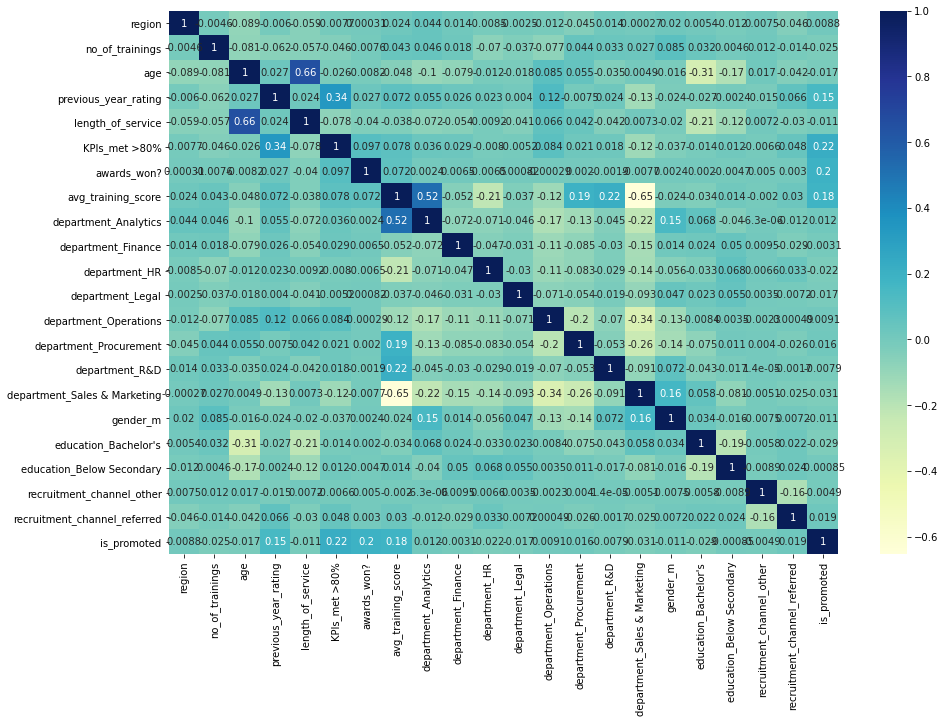

In [1273]:
# figure size
plt.figure(figsize=(15,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [1274]:
#inference from heatmap (Some key observations)

# Age and Length of service   positively related

# KPI met and previous year rating positively related 

# sales and marketing department is negatively related to average training score

# department of Analytics is positively related to average training score

# Bachelor's education is negatively related to age

#etc.

## MODELING PHASE

In [1275]:
df.columns.unique()

Index(['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'gender_m', 'education_Bachelor's',
       'education_Below Secondary', 'recruitment_channel_other',
       'recruitment_channel_referred', 'is_promoted'],
      dtype='object')

In [1276]:
X=df[['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'gender_m', "education_Bachelor's",
       'education_Below Secondary', 'recruitment_channel_other',
       'recruitment_channel_referred']]
X.head(5)

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,gender_m,education_Bachelor's,education_Below Secondary,recruitment_channel_other,recruitment_channel_referred
0,31,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,0,0,0,0,0
1,14,1,30,5.0,4,0,0,60,0,0,...,0,1,0,0,0,1,1,0,1,0
2,10,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,1,1,1,0,0,0
3,15,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,1,1,1,0,1,0
4,18,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,1,1,0,1,0


In [1277]:
y=df["is_promoted"]

#### Cross-Validation

1. Train Test Split : To have unknown datapoints to test the data rather than testing with the same points with 
   which the model was trained. This helps capture the model performance much better.
<br><br/>
2. When model is split into training and testing it can be possible that specific 
   type of data point may go entirely into either training or testing portion.
<br><br/>    
    
3. Stratify parameter makes a split so that the proportion of values in the sample produced will 
   be the same as the proportion of values provided to parameter stratify.
   For example, if variable y is a binary categorical variable with values 0 and 1 and 
   there are 25% of zeros and 75% of ones,
   stratify=y will make sure that random split has 25% of 0's and 75% of 1's.

In [1278]:
# split into train and test (random_state is a pseudo number which fixes the outcome in every run or
# else the distribution in traintest split every time will be different)

#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100, stratify=y)


#### KNN

In [1279]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [1280]:
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.919722678343368


In [1281]:
#Identifying the best k value:-

Accuracy_score = []
for k in range (20) :
    k=k+1
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores=metrics.accuracy_score(y_test,y_pred)
    Accuracy_score.append(scores)
    print('accuracy_scores for k=',k,'is: ',scores)

accuracy_scores for k= 1 is:  0.8804354436538344
accuracy_scores for k= 2 is:  0.9196618621905979
accuracy_scores for k= 3 is:  0.911390865413854
accuracy_scores for k= 4 is:  0.9203916560238399
accuracy_scores for k= 5 is:  0.919722678343368
accuracy_scores for k= 6 is:  0.9224594052180259
accuracy_scores for k= 7 is:  0.9219120598430943
accuracy_scores for k= 8 is:  0.9223377729124855
accuracy_scores for k= 9 is:  0.9222161406069452
accuracy_scores for k= 10 is:  0.9222769567597153
accuracy_scores for k= 11 is:  0.9225810375235662
accuracy_scores for k= 12 is:  0.9222769567597153
accuracy_scores for k= 13 is:  0.9222161406069452
accuracy_scores for k= 14 is:  0.9218512436903241
accuracy_scores for k= 15 is:  0.922520221370796
accuracy_scores for k= 16 is:  0.9223377729124855
accuracy_scores for k= 17 is:  0.9225810375235662
accuracy_scores for k= 18 is:  0.9222161406069452
accuracy_scores for k= 19 is:  0.9224594052180259
accuracy_scores for k= 20 is:  0.9224594052180259


#### At k=6 we are getting maximum accuracy

Text(0, 0.5, 'Accuracy_score')

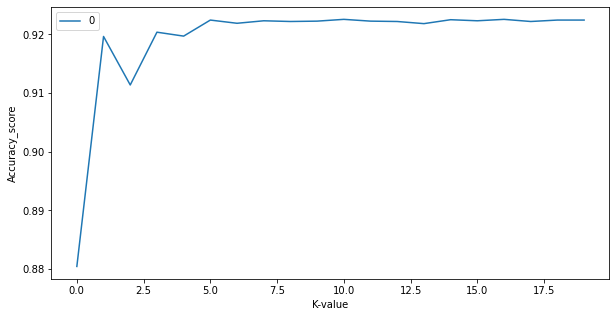

In [1282]:
#plotting the accuracy_scores against k values

curve = pd.DataFrame(Accuracy_score) #elbow curve 
curve.plot(figsize=(10,5))
plt.xlabel("K-value")
plt.ylabel("Accuracy_score")

In [1283]:
# KNN with k = 6

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#### MODEL Evaluation of KNN

In [1284]:
# Confusion Matrix

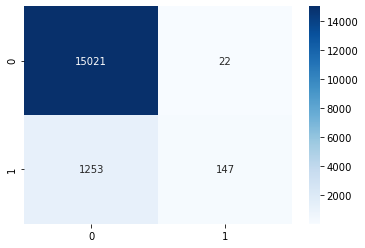

In [1285]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')

###### horizontal is model vertical is actual in conf.matrix

In [1286]:
# Classification Report

In [1287]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15043
           1       0.87      0.10      0.19      1400

    accuracy                           0.92     16443
   macro avg       0.90      0.55      0.57     16443
weighted avg       0.92      0.92      0.89     16443



##### Observations

From the avove classification report our senitivity or recall is very low i.e TPR
Correspondingly our FPR(1-recall) or (1-snisitivity) will be very high
That means quite a few number of employee who are eligble for promotions(1) are classified into
non promoted (0). This may lead to business problem and Attrition rate may increase due to dissatisfaction

##### AUC - ROC Curve

In [1288]:
# Defining a function to plot the ROC curves. 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [1289]:
#predicting the probability for test data for 1s and 0s
probs = knn.predict_proba(X_test)

In [1290]:
# Keep Probabilities of the positive class only i.e 2nd column.
probs = probs[:, 1]

In [1291]:
#Compute the AUC Score.
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f'% auc)  #entirely printed as a string using '%'

AUC: 0.66


In [1292]:
# Getting the ROC Curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

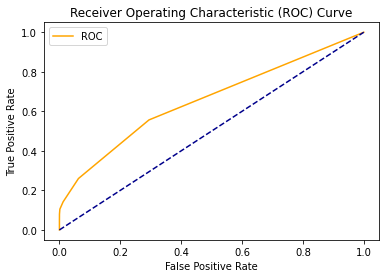

In [1293]:
# Plot ROC Curve using defined function
plot_roc_curve(fpr, tpr)

###### AUC is more than 50%

#### Decision Tree

In [1294]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [1295]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred= DT.predict(X_test)

In [1296]:
# splitting criteria
DT.criterion

'gini'

#### Model Evaluation for Decision Tree

In [1297]:
# Accuracy Score
metrics.accuracy_score(y_test,y_pred)

0.8938149972632731

In [1298]:
# Confusion Matrix

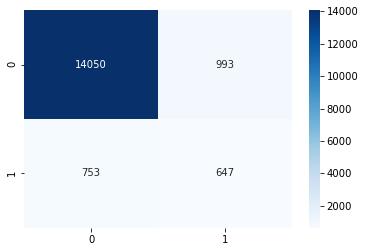

In [1299]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')

###### horizontal is model vertical is actual in conf.matrix

In [1300]:
# Classification Report

In [1301]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     15043
           1       0.39      0.46      0.43      1400

    accuracy                           0.89     16443
   macro avg       0.67      0.70      0.68     16443
weighted avg       0.90      0.89      0.90     16443



#### AUC-ROC for Decision Tree

In [1302]:
#predicting the probability for test data for 1s and 0s
probs = DT.predict_proba(X_test)

In [1303]:
# Keep Probabilities of the positive class only i.e 2nd column.
probs = probs[:, 1]

In [1304]:
#Compute the AUC Score.
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f'% auc)  #entirely printed as a string using '%'

AUC: 0.70


In [1305]:
# Getting the ROC Curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

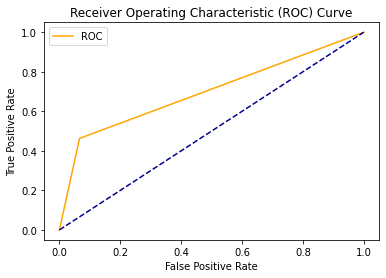

In [1306]:
# Plot ROC Curve using defined function
plot_roc_curve(fpr, tpr)

##### AUC for Decision Tree is more than KNN

#### Random Forest

In [1307]:
from sklearn.ensemble import RandomForestClassifier

In [1308]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

###### Model Evaluation for Random Forest

In [1312]:
# Accuracy Score

metrics.accuracy_score(y_test,y_pred)

0.9354132457580734

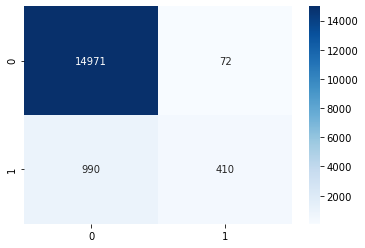

In [1317]:
# Confusion Matrix

cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')

###### horizontal is model vertical is actual in conf.matrix

In [1318]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15043
           1       0.85      0.29      0.44      1400

    accuracy                           0.94     16443
   macro avg       0.89      0.64      0.70     16443
weighted avg       0.93      0.94      0.92     16443



##### Feature importances in Random Forest Model

In [1319]:
df_feature_importance = pd.DataFrame(RF.feature_importances_, index=X_train.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
avg_training_score,0.311596
age,0.137961
region,0.119396
length_of_service,0.108325
previous_year_rating,0.056275
KPIs_met >80%,0.049159
awards_won?,0.028655
department_Sales & Marketing,0.027685
recruitment_channel_other,0.025851
no_of_trainings,0.022688


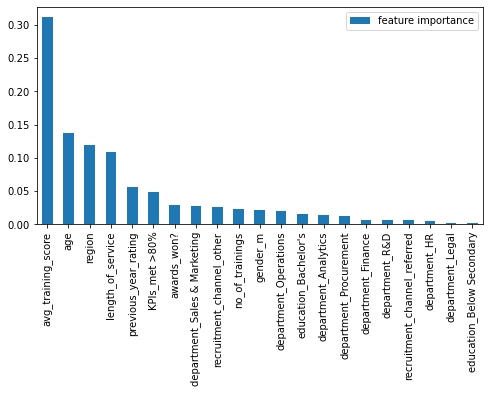

In [1320]:
df_feature_importance.plot.bar(figsize=(8,4))

#### AUC_ROC for Random Forest

In [1321]:
#predicting the probability for test data for 1s and 0s
probs = RF.predict_proba(X_test)

In [1322]:
# Keep Probabilities of the positive class only i.e 2nd column.
probs = probs[:, 1]

In [1323]:
#Compute the AUC Score.
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f'% auc)  #entirely printed as a string using '%'

AUC: 0.88


In [1324]:
# Getting the ROC Curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

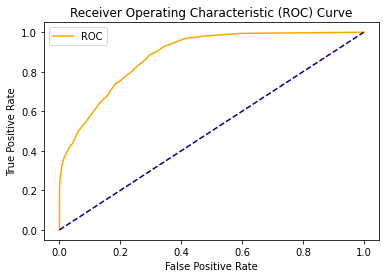

In [1325]:
# Plot ROC Curve using defined function
plot_roc_curve(fpr, tpr)

##### AUC for Random Forest is more than Decision Tree and KNN

### Logist Regression

In [1326]:
#Min Max Scaling ensuring column names are not lost after scaling the features

##### MIN MAX Scaling

In [1327]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()


In [1328]:
X_train.columns.unique()

Index(['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'gender_m', 'education_Bachelor's',
       'education_Below Secondary', 'recruitment_channel_other',
       'recruitment_channel_referred'],
      dtype='object')

In [1329]:
names_train = X_train.columns
names_test=X_test.columns
scaled_df_train = scaler.fit_transform(X_train)
scaled_df_test=scaler.fit_transform(X_test)
scaled_df_train = pd.DataFrame(scaled_df_train, columns=names_train)
scaled_df_test = pd.DataFrame(scaled_df_test, columns=names_test)

In [1330]:
X_train=scaled_df_train
X_train.head(5)

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,gender_m,education_Bachelor's,education_Below Secondary,recruitment_channel_other,recruitment_channel_referred
0,0.606061,0.0,0.325,0.75,0.166667,1.0,0.0,0.733333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.333333,0.0,0.250,0.25,0.083333,0.0,0.0,0.050000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.030303,0.0,0.350,0.00,0.138889,0.0,0.0,0.616667,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.969697,0.0,0.500,0.00,0.277778,0.0,0.0,0.116667,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.333333,0.0,0.775,0.50,0.388889,0.0,0.0,0.533333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1331]:
X_train.columns.unique()

Index(['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'gender_m', 'education_Bachelor's',
       'education_Below Secondary', 'recruitment_channel_other',
       'recruitment_channel_referred'],
      dtype='object')

In [1332]:
X_test=scaled_df_test
X_test.head(5)

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,gender_m,education_Bachelor's,education_Below Secondary,recruitment_channel_other,recruitment_channel_referred
0,0.545455,0.000000,0.325,0.75,0.09375,1.0,0.0,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.666667,0.000000,0.175,0.50,0.15625,0.0,0.0,0.150000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.121212,0.000000,0.300,0.75,0.18750,1.0,0.0,0.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.424242,0.000000,0.200,1.00,0.00000,0.0,0.0,0.350000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.939394,0.111111,0.275,0.25,0.06250,0.0,0.0,0.116667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [1333]:
#Scaling the data 
#(Eventhough Standardization deals with outliers and not put the data in fixed scale between 0-1 as in MinMax normalisation
#Yet we have used MinMax normalisation because my categorical variables are 0s and 1s so I bounded the range of my continuous
#variables also between 0s and 1s so that uniformity is maintained)

In [1334]:
from sklearn.linear_model import LogisticRegression

In [1335]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)


##### Model Evaluation for Logistic

In [1336]:
metrics.accuracy_score(y_test,y_pred)

0.9304871373836892

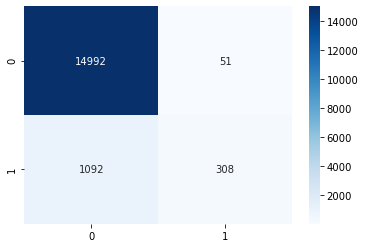

In [1337]:
# Confusion Matrix

cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')

###### horizontal is model vertical is actual in conf.matrix

In [1338]:
#Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15043
           1       0.86      0.22      0.35      1400

    accuracy                           0.93     16443
   macro avg       0.90      0.61      0.66     16443
weighted avg       0.93      0.93      0.91     16443



#### AUC_ROC for Logistic Regression

In [1339]:
#predicting the probability for test data for 1s and 0s
probs = LR.predict_proba(X_test)

In [1340]:
# Keep Probabilities of the positive class only i.e 2nd column.
probs = probs[:, 1]


In [1341]:
#Compute the AUC Score.
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f'% auc)  #entirely printed as a string using '%'

AUC: 0.87


In [1342]:
# Getting the ROC Curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

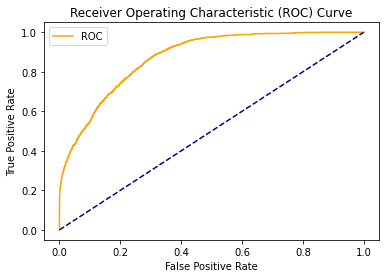

In [1343]:

# Plot ROC Curve using defined function
plot_roc_curve(fpr, tpr)

###### AUC for Logistic is more than Decision Tree and KNN but less than Random Forest

#### Observation


#### We have observed that the Random Forest Classifier Performed better in sense of Accuracy,F-1 Score ,AUC-ROC and TPR

In [ ]:
# After this we will be cleaning and preparing the Sample Test Data Set given in the same-way
# to make our classification( Random Forest).